In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# loading data
data = pd.read_csv('/Users/sinya/Downloads/Tags_6Month.csv',engine = 'python', names=['Rate', 'TagName'])
data.drop(labels=[0],axis=0, inplace = True)  
data['Rate'] = data['Rate'].astype(int)
data['TagName'] = data['TagName'].astype(str)
top_10 = data.head(10)
total_num_Tags= data['Rate'].sum()

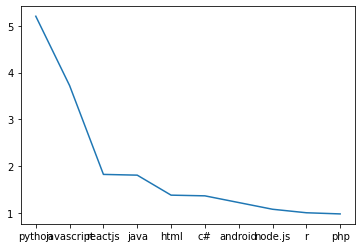

In [52]:
#quick estimation
plt.plot(top_10['TagName'],(top_10['Rate']/total_num_Tags)*100)

<BarContainer object of 10 artists>

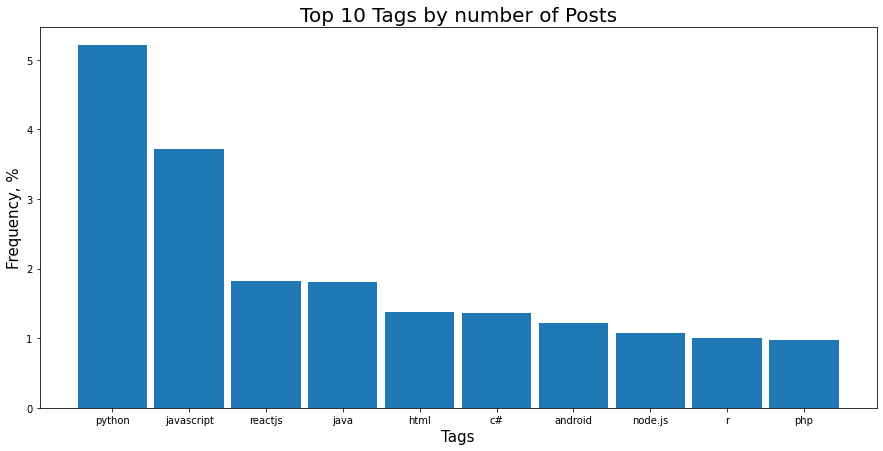

In [77]:
# bar char of freqeuncies
plt.figure(figsize=[15, 7])
plt.title('Top 10 Tags by number of Posts', fontsize=20)
plt.ylabel('Frequency, %', fontsize=15)
plt.xlabel('Tags', fontsize=15)
plt.bar(top_10['TagName'],(top_10['Rate']/total_num_Tags)*100, width=0.9)

<BarContainer object of 10 artists>

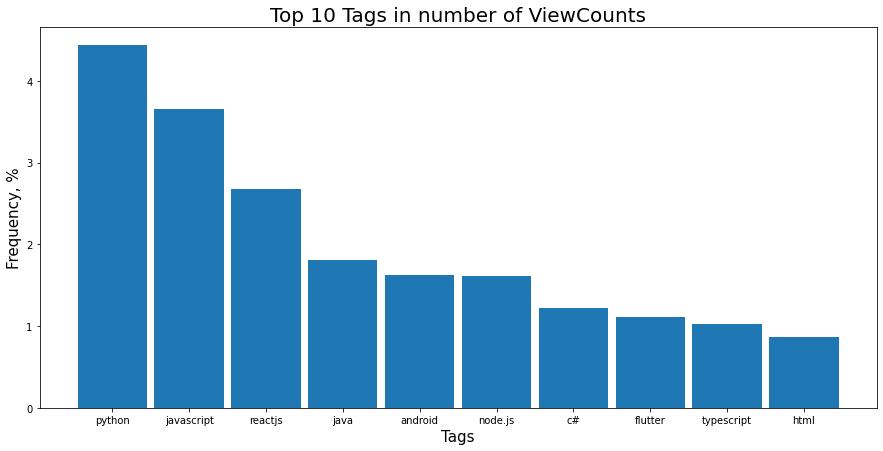

In [75]:
# bar char of freqeuncies with weights(=ViewCounts)

data2 = pd.read_csv('/Users/sinya/Downloads/WeightedTags_6Month.csv',engine = 'python', names=['Rate', 'TagName','WeightedViewCount'])
data2.drop(labels=[0],axis=0, inplace = True)  
data2['Rate'] = data2['Rate'].astype(int)
data2['TagName'] = data2['TagName'].astype(str)
data2['WeightedViewCount'] = data2['WeightedViewCount'].astype(int)

top_10_2 = data2.head(10)
total_weight= data2['WeightedViewCount'].sum()

plt.figure(figsize=[15, 7])
plt.title('Top 10 Tags by number of ViewCounts', fontsize=20)
plt.ylabel('Frequency, %', fontsize=15)
plt.xlabel('Tags', fontsize=15)

plt.bar(top_10_2['TagName'],(top_10_2['WeightedViewCount']/total_weight)*100, width=0.9)

In [96]:
#preparing data for compare plot
    
top_tags=[[0]*10 for i in range(3)]
i = 0
for el in top_10_2['TagName']:
    top_tags[0][i] = el
    top_tags[1][i]= int(data[data['TagName']==el]['Rate'])
    top_tags[2][i]= int(data2[data2['TagName']==el]['WeightedViewCount'])
    i+=1
    
    

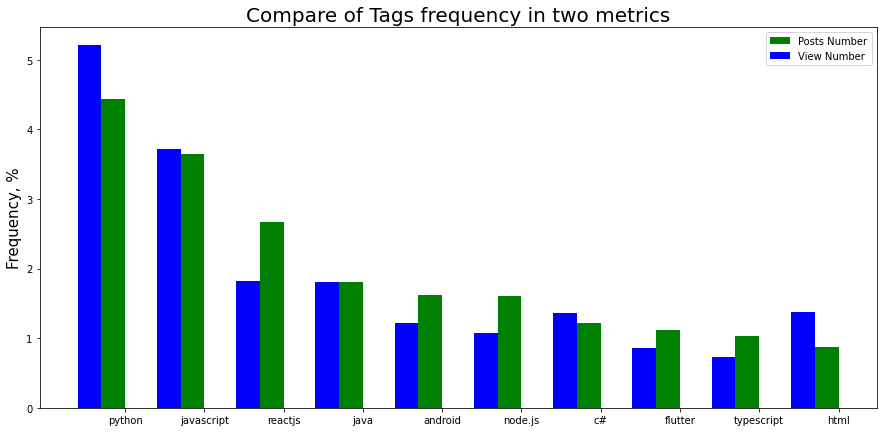

In [97]:
# compare plot

index = np.arange(10)
bw = 0.3
plt.figure(figsize=[15, 7])
plt.title('Compare of Tags frequency in two metrics', fontsize=20)
plt.ylabel('Frequency, %', fontsize=15)
line1 = plt.bar(index, top_tags[1]/total_num_Tags*100, bw, color='b')
line2 = plt.bar(index+bw, top_tags[2]/total_weight*100, bw, color='g')
plt.xticks(index+1.5*bw,top_tags[0])
plt.legend((line2, line1), ['Posts Number', 'View Number'])